## Convolutional Nueral Networks in a nutshell

- accepts 2D and 3D input
- most typical is a 2D input
>
- pass an image
- 2D array of pixels
>
- apply convolutions
- convolution's goal is to locate features of an image
- convolution kernels - take X by X pixels and analyze
> 
- looks for features in that kernel
- work on numbers, not strings or concepts
- first layer of convolution kernels tends to find edges/curves/corners
- following kernel layers tend to find things that the edge/curves/corners build such as squares/circles
>
- [reference in video](https://www.youtube.com/watch?v=9aYuQmMJvjA&t=244s)
>
- end up with condensed version of image
- do a pooling of convolutions
>
- [reference in video](https://www.youtube.com/watch?v=9aYuQmMJvjA&t=362s)
>
*the convolutional model essentially simplifies the image and looks for features of the image, and generally there will be multiple convolutional layers*

## Data to Use & Building the Data

> [link to dataset](https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip)

**Image Resizing Tips and Tricks (abt 2min watch) [link](https://www.youtube.com/watch?v=9aYuQmMJvjA&t=873s)**


### Converting Images to grayscale
 - with images in Covnets, you dont have to convert to grayscale
 - a dense lay/linear layer will require flattened data
 - a convolutional layer can be 1D, 2D, 3D, 8D etc...
 - can make multi-dimensional covnets if want to, so we're good
 >
 - also, is color relevant to identifying cats and dogs? not really?
 - You want to SIMPLIFY and make the model AS SMALL AS POSSIBLE

### Converting Scalar Values to One-Hot Vectors

 - essentially we can use better loss metrics
 
> [reference link](https://youtu.be/9aYuQmMJvjA?t=1396)

### Data Distribution Short Statement

[link](https://www.youtube.com/watch?v=9aYuQmMJvjA&t=1588s)

In [13]:
import os
import cv2
import numpy as np
from tqdm import tqdm
import torch


# We dont want to build data everytime we run our code
# preproccessing can take a long time
# in this case, it is not that large of a dataset
REBUILD_DATA = True

class DogsVSCats():
    # need image sizes to all be the same size for input
    IMG_SIZE = 50 # we are going to make all the images 50x50
    
    CATS = "PetImages/Cat"
    DOGS = "PetImages/Dog"
    LABELS = {CATS: 0, DOGS: 1}
    training_data = []

    catcount = 0
    dogcount = 0

    def make_training_data(self):
        # iterating over all the directories
        for label in self.LABELS:
            print(label)
            # iterate over all the jpg images in the directories
            for f in tqdm(os.listdir(label)):
                if "jpg" in f:
                    try:
                        path = os.path.join(label, f)
                        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                        img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE))
                        self.training_data.append([np.array(img), np.eye(2)[self.LABELS[label]]])

                        if label == self.CATS:
                            self.catcount += 1
                        elif label == self.DOGS:
                            self.dogcount += 1
                    except Exception as e:
                        # some of the images are no good
                        # some might be corrupt or empty
                        # normally would print(str(e)) but we already know what the error is
                        pass
        
        # after we run the for loop, shuffle data
        # shuffles in-place so we dont have to reassign data
        np.random.shuffle(self.training_data)
        np.save("training_data.npy", self.training_data)
        print("Cats: ", self.catcount)
        print("Dogs: ", self.dogcount)

if REBUILD_DATA:
    dogsvcats = DogsVSCats()
    dogsvcats.make_training_data()

PetImages/Cat


100%|██████████| 12501/12501 [00:04<00:00, 2507.43it/s]


PetImages/Dog


100%|██████████| 12501/12501 [00:05<00:00, 2345.72it/s]


Cats:  12476
Dogs:  12470


In [15]:
training_data = np.load("training_data.npy", allow_pickle = True) # dunno whats up with allow_pickle, but need it to load data in this case

In [16]:
print(len(training_data))

24946


In [17]:
print(training_data[1])

[array([[ 61,  53,  50, ...,  48,  48,  52],
       [ 54,  50,  47, ...,  44,  49,  50],
       [ 48,  51,  48, ...,  45,  45,  48],
       ...,
       [168, 167, 168, ..., 120, 110, 121],
       [150, 141, 137, ..., 144, 158, 125],
       [139, 150, 130, ..., 155, 155, 139]], dtype=uint8)
 array([1., 0.])]


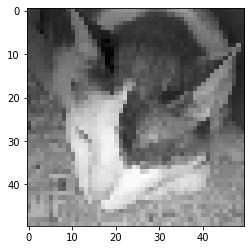

In [19]:
import matplotlib.pyplot as plt 

plt.imshow(training_data[1][0], cmap="gray")
plt.show()

In [ ]:
training_data[1][1]

array([1., 0.])

**^ we can see the calssification**

*remember 1,0 is cat, 0,1 is dog*


- now we want to start taking batches of this data
- pass those batches through out model
- optimizing and learning how to classify images ad dogs and cats